***Cyber Security Breaches Data***

In [1]:
! pip install scikit-optimize

In [2]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime
import time

Now imagine that I am a data scientist wanting to make a model prediction for a company indicating if a cyber security breach will be a labeled as a type of theft or a different type of breach.

First I will load and read the data, then proceed to create three different models. After deciding which model is best for the data, I will then modify the model to produce the best prediction results.

In [3]:
#read the data and show the shape and some of the values
cyber = pd.read_csv('../../Downloads/Cyber Security Breaches.csv')
print(cyber.shape)
cyber.head()

(1055, 14)


,Unnamed: 0,Number,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Date_of_Breach,Type_of_Breach,Location_of_Breached_Information,Date_Posted_or_Updated,Summary,breach_start,breach_end,year
0,1,0,Brooke Army Medical Center,TX,NaN,1000,10/16/2009,Theft,Paper,2014-06-30,A binder containing the protected health infor...,2009-10-16,NaN,2009
1,2,1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,9/22/2009,Theft,Network Server,2014-05-30,Five desktop computers containing unencrypted ...,2009-09-22,NaN,2009
2,3,2,Alaska Department of Health and Social Services,AK,NaN,501,10/12/2009,Theft,"Other Portable Electronic Device, Other",2014-01-23,NaN,2009-10-12,NaN,2009
3,4,3,Health Services for Children with Special Need...,DC,NaN,3800,10/9/2009,Loss,Laptop,2014-01-23,A laptop was lost by an employee while in tran...,2009-10-09,NaN,2009
4,5,4,"L. Douglas Carlson, M.D.",CA,NaN,5257,9/27/2009,Theft,Desktop Computer,2014-01-23,A shared Computer that was used for backup was...,2009-09-27,NaN,2009


In [4]:
#change the "unnamed" column
cyber = cyber.rename(columns={'Unnamed: 0': 'number'})

#drop the "Number" column 
cyber.drop(['Number'], axis=1, inplace=True)
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   number                            1055 non-null   int64 
 1   Name_of_Covered_Entity            1055 non-null   object
 2   State                             1055 non-null   object
 3   Business_Associate_Involved       271 non-null    object
 4   Individuals_Affected              1055 non-null   int64 
 5   Date_of_Breach                    1055 non-null   object
 6   Type_of_Breach                    1055 non-null   object
 7   Location_of_Breached_Information  1055 non-null   object
 8   Date_Posted_or_Updated            1055 non-null   object
 9   Summary                           142 non-null    object
 10  breach_start                      1055 non-null   object
 11  breach_end                        145 non-null    object
 12  year                

***Exploratory Data Analysis***

*Cleaning the dataset for optimal features*

In [5]:
#dropping the columns with too many nulls
#from .info() shows 3 columns with missing data
cyber.drop(['Business_Associate_Involved', 'Summary', 'breach_end'], axis=1, inplace=True)
cyber.info()

#now no missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   number                            1055 non-null   int64 
 1   Name_of_Covered_Entity            1055 non-null   object
 2   State                             1055 non-null   object
 3   Individuals_Affected              1055 non-null   int64 
 4   Date_of_Breach                    1055 non-null   object
 5   Type_of_Breach                    1055 non-null   object
 6   Location_of_Breached_Information  1055 non-null   object
 7   Date_Posted_or_Updated            1055 non-null   object
 8   breach_start                      1055 non-null   object
 9   year                              1055 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 82.5+ KB


In [6]:
#column "breach_start" = date so change from object dtype
#change dtype to datetime
cyber['breach_start'] = pd.to_datetime(cyber['breach_start'])

In [7]:
#extracting the day and month numeric values from breach_start
cyber['breach_month'] = pd.DatetimeIndex(cyber['breach_start']).month
cyber['breach_day'] = pd.DatetimeIndex(cyber['breach_start']).day

#delete breach_start
cyber.drop(['breach_start'], axis=1, inplace=True)
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   number                            1055 non-null   int64 
 1   Name_of_Covered_Entity            1055 non-null   object
 2   State                             1055 non-null   object
 3   Individuals_Affected              1055 non-null   int64 
 4   Date_of_Breach                    1055 non-null   object
 5   Type_of_Breach                    1055 non-null   object
 6   Location_of_Breached_Information  1055 non-null   object
 7   Date_Posted_or_Updated            1055 non-null   object
 8   year                              1055 non-null   int64 
 9   breach_month                      1055 non-null   int64 
 10  breach_day                        1055 non-null   int64 
dtypes: int64(5), object(6)
memory usage: 90.8+ KB


In [8]:
#drop non-essential/repeated columns
cyber = cyber.drop(['number', 'Name_of_Covered_Entity', 'Date_of_Breach', 'State',
                     'Date_Posted_or_Updated'], axis=1)
cyber.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Individuals_Affected              1055 non-null   int64 
 1   Type_of_Breach                    1055 non-null   object
 2   Location_of_Breached_Information  1055 non-null   object
 3   year                              1055 non-null   int64 
 4   breach_month                      1055 non-null   int64 
 5   breach_day                        1055 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 49.6+ KB


In [9]:
#check on counts for object columns
cyber.Location_of_Breached_Information.nunique()

41

In [10]:
cyber.Location_of_Breached_Information.value_counts()

Paper                                                                                                                          227
Laptop                                                                                                                         217
Other                                                                                                                          116
Desktop Computer                                                                                                               113
Network Server                                                                                                                 107
Other Portable Electronic Device                                                                                                60
E-mail                                                                                                                          54
Other Portable Electronic Device, Other                                            

In [11]:
#turn object dtype into dummy column for model
#do not use drop_first=True --- will drop columns later
location = pd.get_dummies(cyber['Location_of_Breached_Information'])
cyber = pd.concat([cyber, location], axis=1)
cyber.shape

(1055, 47)

In [12]:
#the outlier values from the original column drop those dummy columns
value_counts = cyber.Location_of_Breached_Information.value_counts()
to_remove = value_counts[value_counts <= 20].index
cyber = cyber.drop(to_remove, axis=1)

In [13]:
cyber.info()
cyber.head()

#now if row shows 0 in all dummy columns, means (1) in a dropped column (outlier)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Individuals_Affected                     1055 non-null   int64 
 1   Type_of_Breach                           1055 non-null   object
 2   Location_of_Breached_Information         1055 non-null   object
 3   year                                     1055 non-null   int64 
 4   breach_month                             1055 non-null   int64 
 5   breach_day                               1055 non-null   int64 
 6   Desktop Computer                         1055 non-null   uint8 
 7   E-mail                                   1055 non-null   uint8 
 8   Electronic Medical Record                1055 non-null   uint8 
 9   Laptop                                   1055 non-null   uint8 
 10  Network Server                           1055 non-null   uin

,Individuals_Affected,Type_of_Breach,Location_of_Breached_Information,year,breach_month,breach_day,Desktop Computer,E-mail,Electronic Medical Record,Laptop,Network Server,Other,Other Portable Electronic Device,"Other Portable Electronic Device, Other",Paper
0,1000,Theft,Paper,2009,10,16,0,0,0,0,0,0,0,0,1
1,1000,Theft,Network Server,2009,9,22,0,0,0,0,1,0,0,0,0
2,501,Theft,"Other Portable Electronic Device, Other",2009,10,12,0,0,0,0,0,0,0,1,0
3,3800,Loss,Laptop,2009,10,9,0,0,0,1,0,0,0,0,0
4,5257,Theft,Desktop Computer,2009,9,27,1,0,0,0,0,0,0,0,0


***Creating independent variable***

The column "Type_of_Breach is a categorical column with several values that needs to be changed into a binary column (True or 1 **AND** False or 0) for model predictions to work on dataset. 

*this will be my target variable*

In [14]:
cyber.Type_of_Breach.value_counts()

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Theft, Other                                                    5
Loss, Unauthorized Access/Disclosure                            5
Loss, Improper Disposal                                         3
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Unknown, O

In [15]:
#changing column to Theft: True or False
#every value that contains the word "theft" will be grouped together
cyber['Theft'] = cyber['Type_of_Breach'].str.lower().str.contains('theft') 

In [16]:
#check if column is split to True and False and 
# if value counts are not too marginally different
cyber.Theft.value_counts()

#not exactly equal but difference is not substantial

True     571
False    484
Name: Theft, dtype: int64

In [17]:
cyber.info()

#now all my feature columns are numeric types
# I have 13 feature variables 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 16 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Individuals_Affected                     1055 non-null   int64 
 1   Type_of_Breach                           1055 non-null   object
 2   Location_of_Breached_Information         1055 non-null   object
 3   year                                     1055 non-null   int64 
 4   breach_month                             1055 non-null   int64 
 5   breach_day                               1055 non-null   int64 
 6   Desktop Computer                         1055 non-null   uint8 
 7   E-mail                                   1055 non-null   uint8 
 8   Electronic Medical Record                1055 non-null   uint8 
 9   Laptop                                   1055 non-null   uint8 
 10  Network Server                           1055 non-null   uin

In [18]:
cyber.head()

,Individuals_Affected,Type_of_Breach,Location_of_Breached_Information,year,breach_month,breach_day,Desktop Computer,E-mail,Electronic Medical Record,Laptop,Network Server,Other,Other Portable Electronic Device,"Other Portable Electronic Device, Other",Paper,Theft
0,1000,Theft,Paper,2009,10,16,0,0,0,0,0,0,0,0,1,True
1,1000,Theft,Network Server,2009,9,22,0,0,0,0,1,0,0,0,0,True
2,501,Theft,"Other Portable Electronic Device, Other",2009,10,12,0,0,0,0,0,0,0,1,0,True
3,3800,Loss,Laptop,2009,10,9,0,0,0,1,0,0,0,0,0,False
4,5257,Theft,Desktop Computer,2009,9,27,1,0,0,0,0,0,0,0,0,True


***Splitting data for models***

Now that my dataset is cleaned and contains an adequate amount of features, I can split my data into a train and test set and begin to create models

In [19]:
from sklearn.model_selection import train_test_split

X = cyber.drop(['Type_of_Breach', 'Location_of_Breached_Information', 'Theft'], axis=1)
y = cyber['Theft']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [20]:
#how many values are in the train and test set
X_train.shape, X_test.shape

((844, 13), (211, 13))

***Creating Models***

*Classification model types*

choosing 3 different models to compare

In [21]:
#comparing models
from sklearn.metrics import classification_report

#function to easily compare models
def results(model):
    time_start = time.time()
    print('Train Accuracy:', model.score(X_train, y_train), 
          '| Test Accuracy:', model.score(X_test, y_test), 
          '\nExecution time: {} seconds'.format(time.time() - time_start))
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    print('-----Train----\n', classification_report(y_train, y_train_pred))
    print('-----Test-----\n', classification_report(y_test, y_pred))
    display(pd.crosstab(y_test, y_pred))

In [22]:
#first model = KNN
from sklearn.neighbors import KNeighborsClassifier

#use default settings for comparison 
#n_neighbors=5
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
#second model = Random Forest
from sklearn.ensemble import RandomForestClassifier

#using default settings
#max_depth=None --- uses as many trees as want to 
forest = RandomForestClassifier()
forest.fit(X_train, y_train)


RandomForestClassifier()

In [25]:
#RandomForest attempt 2
#changing max_depth=10 so trees are have stopping point
forest_d10 = RandomForestClassifier(max_depth=10)
forest_d10.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [26]:
#third model = gradient boosting
from sklearn.ensemble import GradientBoostingClassifier

#using default settings
#LR=0.1, max_depth=3
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

*Comparison Results*

In [27]:
#results
print('KNN model (default settings):')
results(knn)

KNN model (default settings):
Train Accuracy: 0.6812796208530806 | Test Accuracy: 0.5023696682464455 
Execution time: 0.05639505386352539 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.68      0.60      0.64       393
        True       0.68      0.76      0.72       451

    accuracy                           0.68       844
   macro avg       0.68      0.68      0.68       844
weighted avg       0.68      0.68      0.68       844

-----Test-----
               precision    recall  f1-score   support

       False       0.43      0.45      0.44        91
        True       0.57      0.54      0.55       120

    accuracy                           0.50       211
   macro avg       0.50      0.50      0.50       211
weighted avg       0.51      0.50      0.50       211



col_0,False,True
Theft,,
False,41,50
True,55,65


In [28]:
#forest results
print('Random Forest model (default settings):')
results(forest)

Random Forest model (default settings):
Train Accuracy: 1.0 | Test Accuracy: 0.7298578199052133 
Execution time: 0.0512537956237793 seconds
-----Train----
               precision    recall  f1-score   support

       False       1.00      1.00      1.00       393
        True       1.00      1.00      1.00       451

    accuracy                           1.00       844
   macro avg       1.00      1.00      1.00       844
weighted avg       1.00      1.00      1.00       844

-----Test-----
               precision    recall  f1-score   support

       False       0.66      0.78      0.71        91
        True       0.81      0.69      0.74       120

    accuracy                           0.73       211
   macro avg       0.73      0.74      0.73       211
weighted avg       0.74      0.73      0.73       211



col_0,False,True
Theft,,
False,71,20
True,37,83


In [29]:
#forest attempt 2
print('Random Forest model (max_depth=10):')
results(forest_d10)

Random Forest model (max_depth=10):
Train Accuracy: 0.9395734597156398 | Test Accuracy: 0.7535545023696683 
Execution time: 0.047835350036621094 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.95      0.92      0.93       393
        True       0.93      0.96      0.94       451

    accuracy                           0.94       844
   macro avg       0.94      0.94      0.94       844
weighted avg       0.94      0.94      0.94       844

-----Test-----
               precision    recall  f1-score   support

       False       0.71      0.74      0.72        91
        True       0.79      0.77      0.78       120

    accuracy                           0.75       211
   macro avg       0.75      0.75      0.75       211
weighted avg       0.76      0.75      0.75       211



col_0,False,True
Theft,,
False,67,24
True,28,92


In [30]:
#boosting results
print('Gradient boosting model (default settings):')
results(gbc)

Gradient boosting model (default settings):
Train Accuracy: 0.8199052132701422 | Test Accuracy: 0.7298578199052133 
Execution time: 0.01669907569885254 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.79      0.83      0.81       393
        True       0.85      0.81      0.83       451

    accuracy                           0.82       844
   macro avg       0.82      0.82      0.82       844
weighted avg       0.82      0.82      0.82       844

-----Test-----
               precision    recall  f1-score   support

       False       0.68      0.71      0.70        91
        True       0.77      0.74      0.76       120

    accuracy                           0.73       211
   macro avg       0.73      0.73      0.73       211
weighted avg       0.73      0.73      0.73       211



col_0,False,True
Theft,,
False,65,26
True,31,89


Based off the comparison results between the 3 classification models (KNN, Random Forest, and Gradient Boosting), the best model for my predictions would be the Gradient Boosting model.
The Gradient Boosting model was the fastest taking only 0.0166 seconds to produce compared to Random Forest (both) and KNN models that had execution times of 0.051 & 0.0478 (max_depth=10) seconds and 0.058 seconds, respectively. 

Even though the Random Forest had slightly better recall scores in the test set than the gradient model. The training sets have accuracy scores of 1.0 or 0.939, where as the test accuracy scores for both Random Forest models were 0.729 and 0.753. With the large difference between the train and test accuracy scores, the model is exhibiting overfitting quite a bit. The Random Forest model in general predicts better for current data and not as well as for new data, which poses a problem for future cyber security theft predictions.

The KNN model had the lowest metric scores in between all 3 models. The train and test accuracy scores are 0.663 and 0.526, respectively. This tells me that the default model does not predict theft security breaches well in the train data and worse in the test data.

***Improving my best model***

The scoring metric that I will look at closely will be the *Accuracy scores* between the train and test set and the *Recall scores*. I am looking for the best Accuracy scores with the least amount of difference between the 2 sets of data and the highest recall scores which gives the percentage of True numbers over the total of true plus false numbers.

Initial CV searches

In [35]:
#perform CV to search for best parameters

#function for best_estimator results
def search_results(grid):
    time_start = time.time()
    print('LR:', grid.best_estimator_.learning_rate, 
          '| depth:', grid.best_estimator_.max_depth, 
          '| subsample:', grid.best_estimator_.subsample, 
          '| max_features:', grid.best_estimator_.max_features, 
          '| trees:', grid.best_estimator_.n_estimators_,
          '| loss:', grid.best_estimator_.loss,
          '\nExecution time: {} seconds'.format(time.time() - time_start))
    print('Train Accuracy:', grid.score(X_train, y_train))
    print('Test Accuracy:', grid.score(X_test, y_test))
    y_train_pred = grid.predict(X_train)
    y_pred = grid.predict(X_test)
    print('-----Train----\n', classification_report(y_train, y_train_pred))
    print('-----Test----\n', classification_report(y_test, y_pred))
    display(pd.crosstab(y_test, y_pred))

In [32]:
#bayes search cv
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

parameters = {'learning_rate': Real(0.1, 0.9), 
              'max_depth': Integer(2, 12), 
              'subsample': Real(0.2, 1.0), 
              'max_features': Categorical([None, 'sqrt', 0.75]),
              'loss': Categorical(['deviance', 'exponential'])}

grad_bayes = BayesSearchCV(GradientBoostingClassifier(n_iter_no_change=10), parameters, cv=5, 
                           scoring='recall_macro', n_jobs=2)

grad_bayes.fit(X_train, y_train)

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(n_iter_no_change=10),
              n_jobs=2, scoring='recall_macro',
              search_spaces={'learning_rate': Real(low=0.1, high=0.9, prior='uniform', transform='identity'),
                             'loss': Categorical(categories=('deviance', 'exponential'), prior=None),
                             'max_depth': Integer(low=2, high=12, prior='uniform', transform='identity'),
                             'max_features': Categorical(categories=(None, 'sqrt', 0.75), prior=None),
                             'subsample': Real(low=0.2, high=1.0, prior='uniform', transform='identity')})

In [33]:
#grid search
from sklearn.model_selection import GridSearchCV

parameters = {'learning_rate':[0.1, 0.3, 0.6, 0.9], 
              'max_depth':[2, 4, 8, 12], 
              'subsample':[1.0, 0.8, 0.6, 0.2], 
              'max_features': [None, 'sqrt', 0.75], 
              'loss': ['deviance', 'exponential']}

grad_grid = GridSearchCV(GradientBoostingClassifier(n_iter_no_change=10), parameters, cv=5, 
                         scoring='recall_macro', n_jobs=2)

grad_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_iter_no_change=10),
             n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.9],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 4, 8, 12],
                         'max_features': [None, 'sqrt', 0.75],
                         'subsample': [1.0, 0.8, 0.6, 0.2]},
             scoring='recall_macro')

*Comparing CV results*

In [36]:
search_results(grad_bayes)

LR: 0.1 | depth: 2 | subsample: 0.7361847566986355 | max_features: sqrt | trees: 32 | loss: exponential 
Execution time: 1.0013580322265625e-05 seconds
Train Accuracy: 0.7334309394447172
Test Accuracy: 0.7439102564102564
-----Train----
               precision    recall  f1-score   support

       False       0.66      0.84      0.74       393
        True       0.82      0.63      0.71       451

    accuracy                           0.73       844
   macro avg       0.74      0.73      0.73       844
weighted avg       0.74      0.73      0.72       844

-----Test----
               precision    recall  f1-score   support

       False       0.64      0.85      0.73        91
        True       0.85      0.64      0.73       120

    accuracy                           0.73       211
   macro avg       0.74      0.74      0.73       211
weighted avg       0.76      0.73      0.73       211



col_0,False,True
Theft,,
False,77,14
True,43,77


In [37]:
x_cols = X_train.columns

pd.DataFrame({'columns': x_cols, 'importance scores':grad_bayes.best_estimator_.feature_importances_}).sort_values(
    by='importance scores', ascending=False)

,columns,importance scores
7,Laptop,0.501468
4,Desktop Computer,0.086335
5,E-mail,0.082027
8,Network Server,0.073178
9,Other,0.068392
1,year,0.053874
0,Individuals_Affected,0.039788
12,Paper,0.028794
3,breach_day,0.026968
2,breach_month,0.022527


In [38]:
search_results(grad_grid)

LR: 0.3 | depth: 2 | subsample: 1.0 | max_features: sqrt | trees: 25 | loss: deviance 
Execution time: 7.867813110351562e-06 seconds
Train Accuracy: 0.7626366062411492
Test Accuracy: 0.7469322344322344
-----Train----
               precision    recall  f1-score   support

       False       0.72      0.79      0.75       393
        True       0.80      0.73      0.77       451

    accuracy                           0.76       844
   macro avg       0.76      0.76      0.76       844
weighted avg       0.76      0.76      0.76       844

-----Test----
               precision    recall  f1-score   support

       False       0.66      0.80      0.73        91
        True       0.82      0.69      0.75       120

    accuracy                           0.74       211
   macro avg       0.74      0.75      0.74       211
weighted avg       0.75      0.74      0.74       211



col_0,False,True
Theft,,
False,73,18
True,37,83


In [39]:
x_cols = X_train.columns

pd.DataFrame({'columns': x_cols, 'importance scores':grad_grid.best_estimator_.feature_importances_}).sort_values(
    by='importance scores', ascending=False)

,columns,importance scores
7,Laptop,0.388028
5,E-mail,0.142410
9,Other,0.114624
0,Individuals_Affected,0.067916
8,Network Server,0.067176
12,Paper,0.064440
4,Desktop Computer,0.047833
1,year,0.039691
3,breach_day,0.031262
11,"Other Portable Electronic Device, Other",0.012982


*Second attempt on CV searches*

In [40]:
#bayes search 2.0
#changing scoring metric

grad_bayes2 = BayesSearchCV(GradientBoostingClassifier(n_iter_no_change=10), parameters, cv=5, 
                           scoring='recall', n_jobs=2)

grad_bayes2.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/lib/python3.8/site-packages/skopt/optimizer/optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/opt/anaconda3/

BayesSearchCV(cv=5, estimator=GradientBoostingClassifier(n_iter_no_change=10),
              n_jobs=2, scoring='recall',
              search_spaces={'learning_rate': [0.1, 0.3, 0.6, 0.9],
                             'loss': ['deviance', 'exponential'],
                             'max_depth': [2, 4, 8, 12],
                             'max_features': [None, 'sqrt', 0.75],
                             'subsample': [1.0, 0.8, 0.6, 0.2]})

In [41]:
#grid search 2.0
#changing scoring metric
grad_grid2 = GridSearchCV(GradientBoostingClassifier(n_iter_no_change=10), parameters, cv=5, 
                         scoring='recall', n_jobs=2)

grad_grid2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(n_iter_no_change=10),
             n_jobs=2,
             param_grid={'learning_rate': [0.1, 0.3, 0.6, 0.9],
                         'loss': ['deviance', 'exponential'],
                         'max_depth': [2, 4, 8, 12],
                         'max_features': [None, 'sqrt', 0.75],
                         'subsample': [1.0, 0.8, 0.6, 0.2]},
             scoring='recall')

*Results from second cv search attempts*

In [42]:
search_results(grad_bayes2)

LR: 0.6 | depth: 8 | subsample: 0.8 | max_features: sqrt | trees: 11 | loss: exponential 
Execution time: 1.0013580322265625e-05 seconds
Train Accuracy: 0.9223946784922394
Test Accuracy: 0.7333333333333333
-----Train----
               precision    recall  f1-score   support

       False       0.91      0.90      0.91       393
        True       0.91      0.92      0.92       451

    accuracy                           0.91       844
   macro avg       0.91      0.91      0.91       844
weighted avg       0.91      0.91      0.91       844

-----Test----
               precision    recall  f1-score   support

       False       0.67      0.70      0.68        91
        True       0.77      0.73      0.75       120

    accuracy                           0.72       211
   macro avg       0.72      0.72      0.72       211
weighted avg       0.72      0.72      0.72       211



col_0,False,True
Theft,,
False,64,27
True,32,88


In [43]:
search_results(grad_grid2)

LR: 0.1 | depth: 12 | subsample: 0.2 | max_features: sqrt | trees: 17 | loss: exponential 
Execution time: 7.867813110351562e-06 seconds
Train Accuracy: 0.8292682926829268
Test Accuracy: 0.7416666666666667
-----Train----
               precision    recall  f1-score   support

       False       0.80      0.79      0.80       393
        True       0.82      0.83      0.82       451

    accuracy                           0.81       844
   macro avg       0.81      0.81      0.81       844
weighted avg       0.81      0.81      0.81       844

-----Test----
               precision    recall  f1-score   support

       False       0.66      0.65      0.65        91
        True       0.74      0.74      0.74       120

    accuracy                           0.70       211
   macro avg       0.70      0.70      0.70       211
weighted avg       0.70      0.70      0.70       211



col_0,False,True
Theft,,
False,59,32
True,31,89


The best value for scoring in the CrossValidation searches was the "recall_macro" as this setting focused on the recall scores of both True and False. When the scoring="recall", the True values had a higher recall score, but the models seemed to be overfitting for the train sets. Also, the best parameters (when scoring="recall") for learning rate, max depth, and subsample were very different between the two CV searches. While, the best parameters for the inital CV search (scoring="recall_macro") were only slightly different.

Based off these findings, I will use the parameters from the inital CV searches (scoring="recall_macro") as a basis for my model. Because there were some differences in parameters between the 2 CV searches, I will tweak those parameters in the GradientBoostingClassifier() to provide the best model.

**Tweaking parameters from CV searches results**

*start with BayesSearch parameters first*

In [44]:
#tweaking parameters from bayes search

gbc_2 = GradientBoostingClassifier(learning_rate=0.1, loss='exponential', n_estimators=32, 
                                   subsample=0.75, max_depth=2, max_features='sqrt')
gbc_2.fit(X_train, y_train)

GradientBoostingClassifier(loss='exponential', max_depth=2, max_features='sqrt',
                           n_estimators=32, subsample=0.75)

In [45]:
results(gbc_2)

Train Accuracy: 0.7440758293838863 | Test Accuracy: 0.7109004739336493 
Execution time: 0.007756710052490234 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.70      0.79      0.74       393
        True       0.79      0.71      0.75       451

    accuracy                           0.74       844
   macro avg       0.75      0.75      0.74       844
weighted avg       0.75      0.74      0.74       844

-----Test-----
               precision    recall  f1-score   support

       False       0.65      0.71      0.68        91
        True       0.77      0.71      0.74       120

    accuracy                           0.71       211
   macro avg       0.71      0.71      0.71       211
weighted avg       0.72      0.71      0.71       211



col_0,False,True
Theft,,
False,65,26
True,35,85


In [46]:
#changing LR
gbc_3 = GradientBoostingClassifier(learning_rate=0.3, loss='exponential', n_estimators=32, 
                                   subsample=0.75, max_depth=2, max_features='sqrt')
gbc_3.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, loss='exponential', max_depth=2,
                           max_features='sqrt', n_estimators=32,
                           subsample=0.75)

In [47]:
results(gbc_3)

#best accuracy scores between 3 different LR's

Train Accuracy: 0.7571090047393365 | Test Accuracy: 0.7345971563981043 
Execution time: 0.008156776428222656 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.71      0.80      0.75       393
        True       0.80      0.72      0.76       451

    accuracy                           0.76       844
   macro avg       0.76      0.76      0.76       844
weighted avg       0.76      0.76      0.76       844

-----Test-----
               precision    recall  f1-score   support

       False       0.67      0.77      0.71        91
        True       0.80      0.71      0.75       120

    accuracy                           0.73       211
   macro avg       0.73      0.74      0.73       211
weighted avg       0.74      0.73      0.74       211



col_0,False,True
Theft,,
False,70,21
True,35,85


In [48]:
#changing LR
gbc_4 = GradientBoostingClassifier(learning_rate=0.2, loss='exponential', n_estimators=32, 
                                   subsample=0.75, max_depth=2, max_features='sqrt')
gbc_4.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.2, loss='exponential', max_depth=2,
                           max_features='sqrt', n_estimators=32,
                           subsample=0.75)

In [49]:
results(gbc_4)

Train Accuracy: 0.7345971563981043 | Test Accuracy: 0.7014218009478673 
Execution time: 0.008205175399780273 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.68      0.81      0.74       393
        True       0.80      0.67      0.73       451

    accuracy                           0.73       844
   macro avg       0.74      0.74      0.73       844
weighted avg       0.75      0.73      0.73       844

-----Test-----
               precision    recall  f1-score   support

       False       0.63      0.73      0.68        91
        True       0.77      0.68      0.72       120

    accuracy                           0.70       211
   macro avg       0.70      0.70      0.70       211
weighted avg       0.71      0.70      0.70       211



col_0,False,True
Theft,,
False,66,25
True,38,82


In [50]:
#changing loss
gbc_5 = GradientBoostingClassifier(learning_rate=0.3, loss='deviance', n_estimators=32, 
                                   subsample=0.75, max_depth=2, max_features='sqrt')
gbc_5.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, max_features='sqrt',
                           n_estimators=32, subsample=0.75)

In [51]:
results(gbc_5)

#same accuracy scores even when loss changed to deviance
# but better recall scores

Train Accuracy: 0.7523696682464455 | Test Accuracy: 0.7393364928909952 
Execution time: 0.008486032485961914 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.71      0.79      0.75       393
        True       0.80      0.72      0.76       451

    accuracy                           0.75       844
   macro avg       0.75      0.75      0.75       844
weighted avg       0.76      0.75      0.75       844

-----Test-----
               precision    recall  f1-score   support

       False       0.68      0.75      0.71        91
        True       0.79      0.73      0.76       120

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.74      0.74      0.74       211



col_0,False,True
Theft,,
False,68,23
True,32,88


In [52]:
#changing n_estimators 
gbc_6 = GradientBoostingClassifier(learning_rate=0.3, loss='deviance', n_estimators=25, 
                                   subsample=0.75, max_depth=2, max_features='sqrt')
gbc_6.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, max_features='sqrt',
                           n_estimators=25, subsample=0.75)

In [53]:
results(gbc_6)

Train Accuracy: 0.759478672985782 | Test Accuracy: 0.7156398104265402 
Execution time: 0.008373022079467773 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.72      0.80      0.76       393
        True       0.81      0.72      0.76       451

    accuracy                           0.76       844
   macro avg       0.76      0.76      0.76       844
weighted avg       0.76      0.76      0.76       844

-----Test-----
               precision    recall  f1-score   support

       False       0.65      0.74      0.69        91
        True       0.78      0.70      0.74       120

    accuracy                           0.72       211
   macro avg       0.71      0.72      0.71       211
weighted avg       0.72      0.72      0.72       211



col_0,False,True
Theft,,
False,67,24
True,36,84


In [54]:
#changing subsample
gbc_7 = GradientBoostingClassifier(learning_rate=0.3, loss='deviance', n_estimators=32, 
                                   subsample=1.0, max_depth=2, max_features='sqrt')
gbc_7.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=2, max_features='sqrt',
                           n_estimators=32)

In [55]:
results(gbc_7)

Train Accuracy: 0.7630331753554502 | Test Accuracy: 0.7393364928909952 
Execution time: 0.009632110595703125 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.73      0.79      0.76       393
        True       0.80      0.74      0.77       451

    accuracy                           0.76       844
   macro avg       0.76      0.76      0.76       844
weighted avg       0.77      0.76      0.76       844

-----Test-----
               precision    recall  f1-score   support

       False       0.67      0.77      0.72        91
        True       0.80      0.72      0.76       120

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.75      0.74      0.74       211



col_0,False,True
Theft,,
False,70,21
True,34,86


Comparing the 2 different CV searches there were 4 "best" parameters that were slighlty different. So I went and changed each one **separately** starting with the learning rate and found the best parameters for my prediction of cyber security breaches labeled as "theft" or not in the Gradient Boosting Classifier model. 

So, between the 6 different gbc models where I changed the learning rate, loss, n_estimators, and subsample, the best parameters for my model are:

* learning_rate=0.3
* loss='deviance' (default parameter)
* subsample=0.75
* n_estimators=32
* max_depth=2
* max_features='sqrt'

These parameters gave me the best results in a confusion matrix with low false negatives and positives. The accuracy scores were the best without seeing the training set start to overfit. Also the difference between the scores was the lowest. The recall scores in both the train **and** test set provided the highest numbers for both False and True values. 

**Illustrating best parameters**

In [56]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_curve

#function for confusion matrix
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
  import itertools

  accuracy = np.trace(cm) / float(np.sum(cm))
  misclass = 1 - accuracy

  if cmap is None:
    cmap = plt.get_cmap('Blues')
  
  plt.figure(figsize=(8,6))
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()

  if target_names is not None:
    tick_marks = np.arange(len(target_names))
    plt.xticks(tick_marks, target_names, rotation=45)
    plt.yticks(tick_marks, target_names)
  
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
  
  thresh = cm.max() / 1.5 if normalize else cm.max() / 2
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if normalize:
      plt.text(j, i, '{:0.4f}'.format(cm[i, j]),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
    else:
      plt.text(j, i, '{:,}'.format(cm[i, j]),
               horizontalalignment='center',
               color='white' if cm[i, j] > thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

Train accuracy: 0.7523696682464455
Test accuracy: 0.7393364928909952


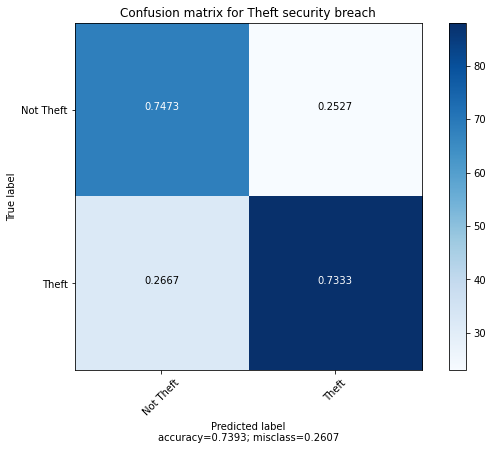

In [57]:
#gbc_5 contains the best parameters
print('Train accuracy:', gbc_5.score(X_train, y_train))
print('Test accuracy:', gbc_5.score(X_test, y_test))


y_test_pred = gbc_5.predict(X_test)

cm = confusion_matrix(y_test, y_test_pred)
plot_confusion_matrix(cm, target_names=['Not Theft', 'Theft'], 
                      title='Confusion matrix for Theft security breach', normalize=True)

In [62]:
#GBC(LR=0.3, loss=deviance, subsample=0.75, n_estimators=32, max_feat=sqrt, max_depth=2)
results(gbc_5)

Train Accuracy: 0.7523696682464455 | Test Accuracy: 0.7393364928909952 
Execution time: 0.01775527000427246 seconds
-----Train----
               precision    recall  f1-score   support

       False       0.71      0.79      0.75       393
        True       0.80      0.72      0.76       451

    accuracy                           0.75       844
   macro avg       0.75      0.75      0.75       844
weighted avg       0.76      0.75      0.75       844

-----Test-----
               precision    recall  f1-score   support

       False       0.68      0.75      0.71        91
        True       0.79      0.73      0.76       120

    accuracy                           0.74       211
   macro avg       0.74      0.74      0.74       211
weighted avg       0.74      0.74      0.74       211



col_0,False,True
Theft,,
False,68,23
True,32,88


In [59]:
probs = gbc_5.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, probs)

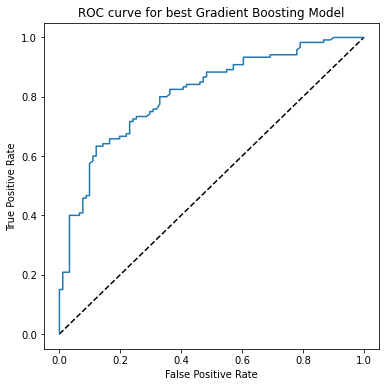

In [60]:
#ROC curve of TP vs FP
fig = plt.figure(figsize = (6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for best Gradient Boosting Model')
plt.show()

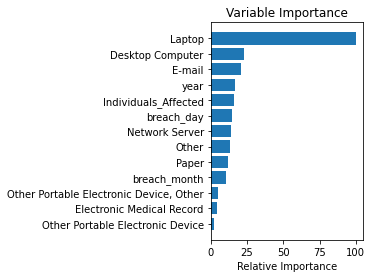

In [70]:
feature_importance = gbc_5.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

The Confusion Matrix of the GradientBoostingClassifier model illustrates the recall scores of the test set ("new" data). The recall scores, which refers to the percentage of total relevant results correctly classified by my model, for the True class is 0.72 for the train set and 0.73 for the test set. The recall scores for the False class is 0.79 for the train set and 0.75 for the test set. 

In layman terms, if I state that a breach will not be labeled as "theft", I will be correct 74.73% of the time. Whereas the percentage of me stating a cyber security breach will not be labeled as "theft" but am wrong (False negative) is 26.67% of the time.

On the other hand if I state that a breach will be labeled as "theft", I will be right 73.3% of the time. And if I state a breach will be label as "theft" but am wrong (FP), the percentage would be 25.27%. 

The Execution time of the model is 0.0177 seconds meaning that a prediction will be executed quickly for security breaches. The train accuracy and the test accuracy are 75.2% and 73.9%, respectively. The model is accurately predicting outcomes for the current data (train) 75% of the time. The model is accurately predicting outcomes for new data (test) almost 74% of the time. So the accuracy of my model is very similiar for current data and new data. 


Metadata:

number

* similar to index of observations

Name_of_Covered_Entity

* name of the covered company/organization that experienced a cyber security breach
* health care industry

State

* State where the company/organization headquartered

Business_associated_involved

* lists businesses associated with covered entity (very sparse)

Individuals_Affected

* individuals that were affected from breach

Date_of_Breach

* date breach occurred

Type_of_Breach

* categorical type of breach

Location_of_Breached_Information

* location of information that was breached

Date_Posted_or_Updated

* date breach was posted/updated to database

Summary

* summary description of breach (sparse data)

breach_start

* start date of breach

breach_end

* end date of breach (sparse data)

year

* year breach occurred